이 강의는 다양한 파일 형식(csv, json, xml)을 정의하고, Python을 사용하여 데이터를 읽고 출력하는 방법을 설명합니다. 각 파일 형식에 대한 설명과 코드 스니펫은 다음과 같습니다.

### 1. CSV 파일

쉼표로 구분된 값을 저장하는 파일 형식입니다. Pandas 라이브러리를 사용하여 읽고 출력할 수 있습니다.

**코드 스니펫:**

```python
import pandas as pd

# CSV 파일을 변수에 할당합니다.
file_path = 'FileExample.csv'

# Pandas를 사용하여 파일을 읽습니다.
df = pd.read_csv(file_path)

# 데이터를 화면에 출력합니다.
print(df)

# 헤더를 지정하여 데이터를 정리합니다.
df = pd.read_csv(file_path, names=['Column1', 'Column2', ...])
print(df)
```

### 2. JSON 파일

텍스트를 언어 독립적인 데이터 형식으로 작성하는 파일 형식입니다. Python 딕셔너리와 유사하며, json 라이브러리를 사용하여 읽고 출력할 수 있습니다.

**코드 스니펫:**

```python
import json

# JSON 파일을 엽니다.
with open('FileExample.json', 'r') as f:
    # json.load()를 사용하여 파일을 읽습니다.
    data = json.load(f)

# 파일을 출력합니다.
print(data)
```

### 3. XML 파일

Extensible Markup Language의 약자로, Pandas 라이브러리에서 직접 읽을 수는 없지만 xml 라이브러리를 사용하여 파싱할 수 있습니다.

**코드 스니펫:**

```python
import xml.etree.ElementTree as ET

# XML 파일을 파싱합니다.
tree = ET.parse('FileExample.xml')
root = tree.getroot()

# 열 헤더를 추가하고 데이터프레임에 할당합니다.
columns = ['Column1', 'Column2', ...]
df = pd.DataFrame(columns=columns)

# 문서를 반복하여 필요한 데이터를 수집하고 데이터프레임에 추가합니다.
for element in root.findall('.//element'):
    row = [element.find('Column1').text, element.find('Column2').text, ...]
    df = df.append(pd.Series(row, index=columns), ignore_index=True)

print(df)
```



**예제**에서 사용했던 `.//element`  형태에 맞는 XML 예시입니다.

```xml
<data>
  <element>
    <Column1>값1</Column1>
    <Column2>값2</Column2>
    <Column3>값3</Column3>
  </element>
  <element>
    <Column1>값4</Column1>
    <Column2>값5</Column2>
    <Column3>값6</Column3>
  </element>
</data>
```

이 XML 에서 `.//element`는 `<data>` 아래에 있는 모든 `<element>` 태그를 찾아서, 각 `<element>` 태그 아래에 있는 `<Column1>`, `<Column2>`, `<Column3>` 태그의 값을 추출하게 됩니다.

반면,
**코드 스니펫:**

```python
import xml.etree.ElementTree as ET

# XML 파일을 파싱합니다.
tree = ET.parse('FileExample.xml')
root = tree.getroot()

# 열 헤더를 추가하고 데이터프레임에 할당합니다.
columns = ['Column1', 'Column2', ...]
df = pd.DataFrame(columns=columns)

# 문서를 반복하여 필요한 데이터를 수집하고 데이터프레임에 추가합니다.
for node in root:
    name = node.find("name").text
    phonenumber = node.find("phonenumber").text
    birthday = node.find("birthday").text
    df = df.append(pd.Series([name, phonenumber, birthday], index=columns), ignore_index = True)
print(df)
```

**아래 예제**처럼 `root`에서 바로 `name`, `phonenumber`, `birthday`를 찾는 경우에 해당하는 XML 예시입니다.

```xml
<person>
  <name>홍길동</name>
  <phonenumber>010-1234-5678</phonenumber>
  <birthday>1990-01-01</birthday>
</person>
```

이 XML 에서는 `root`에 해당하는 `<person>` 태그 바로 아래에 `<name>`, `<phonenumber>`, `<birthday>` 태그가 위치하고 있습니다. 따라서 `root.find('name')`과 같이 바로 접근하여 값을 추출할 수 있습니다.

이처럼 XML 구조가 어떻게 되어 있는지에 따라 데이터를 추출하는 방법이 달라진다는 것을 알 수 있죠? 😉


# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#Data-Engineering">Data Engineering</a>
2.  <a href="#Data-Engineering-Process">Data Engineering Process</a>
3.  <a href="#Working-with-different-file-formats">Working with different file formats</a>
    1. <a href="#csv">CSV</a>
    2. <a href="#json">JSON</a>
    3. <a href="#xlsx">XLSX</a>
    4. <a href="#xml">XML</a>
4.  <a href="#data">Data Analysis</a><br>

</font>
</div>


# Data Engineering

**Data engineering** is one of the most critical and foundational skills in any data scientist’s toolkit.

# Data Engineering Process
**데이터 엔지니어링 프로세스에는 여러 단계가 있습니다.**

1. **추출(Extract)** – 데이터 추출은 여러 소스로부터 데이터를 가져오는 과정입니다. 예를 들어, 웹 스크래핑을 통해 웹사이트에서 데이터를 추출하거나, JSON, CSV, XLSX와 같은 다양한 형식으로 저장된 정보를 수집하는 것을 의미합니다.

2. **변환(Transform)** – 데이터를 변환하는 과정은 추가 분석에 필요하지 않은 데이터를 제거하고, 여러 소스에서 가져온 데이터를 동일한 형식으로 변환하는 것을 의미합니다.

3. **적재(Load)** – 변환된 데이터를 데이터 웨어하우스에 적재하는 과정입니다. 데이터 웨어하우스는 대량의 데이터를 저장하는 공간으로, 이 데이터를 통해 다양한 인사이트를 얻을 수 있습니다.

# Working with different file formats
**현실 세계에서 사람들은 깔끔한 표 형식의 데이터를 거의 접하지 못합니다.**  
따라서 데이터 과학자(또는 데이터 엔지니어)는 다양한 파일 형식에 대해 알고 있어야 하며, 이 파일들을 처리할 때 발생하는 일반적인 문제들과 이를 가장 효율적으로 처리하는 방법을 숙지하는 것이 필수적입니다. 이러한 내용의 일부는 다른 모듈에서 이미 다루었습니다.

#### File Format
**파일 형식(File Format)**은 정보를 파일에 저장하기 위해 인코딩하는 표준 방법을 의미합니다.  

첫째, 파일 형식은 파일이 **바이너리(Binary)** 파일인지 **ASCII** 파일인지를 지정합니다.  
둘째, 정보가 어떻게 구성되어 있는지를 보여줍니다. 예를 들어, **CSV(Comma-Separated Values)** 파일 형식은 표 형식 데이터를 **일반 텍스트(Plain Text)**로 저장합니다.  

파일 형식을 식별하기 위해 일반적으로 **파일 확장자(File Extension)**를 확인할 수 있습니다. 예를 들어, **"CSV"** 형식으로 저장된 파일 이름이 **"Data"**라면 **Data.csv**로 나타납니다. **.csv** 확장자를 보면, 해당 파일이 **CSV 파일**이며 데이터가 표 형식으로 저장되어 있음을 쉽게 알 수 있습니다.

데이터셋에는 다양한 형식이 있습니다. 예를 들어, **.csv**, **.json**, **.xlsx** 등이 그 예시입니다. 이러한 데이터셋은 **로컬 컴퓨터**에 저장될 수도 있고, 때로는 **온라인**에 저장될 수도 있습니다.

**이 섹션에서는 Jupyter Notebook에 데이터셋을 불러오는 방법을 배울 것입니다.**

# Comma-separated values (CSV) file format

**CSV(Comma-Separated Values)** 파일 형식은 **스프레드시트(Spreadsheet)** 파일 형식에 속합니다.

스프레드시트 파일 형식에서는 데이터가 **셀(Cell)**에 저장되며, 각 셀은 **행(Row)**과 **열(Column)**로 구성됩니다.  
스프레드시트의 열은 **다양한 데이터 유형**을 가질 수 있습니다. 예를 들어, 열에는 **문자열(String)**, **날짜(Date)**, 또는 **정수(Integer)**와 같은 데이터 유형이 포함될 수 있습니다.

CSV 파일에서는 **각 줄(Line)**이 하나의 **관측값(Observation)** 또는 흔히 **레코드(Record)**라고 불리는 데이터를 나타냅니다.  
각 레코드는 **여러 필드(Field)**로 구성될 수 있으며, 이 필드들은 **쉼표(Comma)**로 구분됩니다.

<a id=csv></a>
## Reading data from CSV in Python

**Pandas** 라이브러리는 다양한 데이터셋을 **Pandas 데이터프레임(Data Frame)**으로 읽어올 수 있는 유용한 도구입니다.

이제 Pandas 라이브러리를 사용하여 **CSV 파일을 읽는 방법**을 알아보겠습니다.

Pandas에서는 **`pandas.read_csv()`** 함수를 사용하여 CSV 파일을 읽습니다.  
괄호 안에 **파일 경로(file path)**를 **따옴표**로 묶어 인수로 넣으면, Pandas가 해당 경로에서 파일을 읽어와 데이터프레임으로 변환합니다.  

파일 경로는 **URL**일 수도 있고, **로컬 파일 경로(Local File Address)**일 수도 있습니다.

#### 📌 **예제 코드:**

```python
import pandas as pd

# CSV 파일을 읽어서 데이터프레임으로 변환
df = pd.read_csv("data.csv")

# 데이터프레임 출력
print(df)
```  

✅ **URL로 파일 읽기 예시:**

```python
df = pd.read_csv("https://example.com/data.csv")
```  

✅ **로컬 파일 읽기 예시:**

```python
df = pd.read_csv("C:/Users/YourName/Documents/data.csv")
```  

이와 같이 Pandas를 사용하면 CSV 파일을 쉽게 데이터프레임으로 가져올 수 있습니다. 😊

In [3]:
import pandas as pd

filename = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv'

df = pd.read_csv(filename, header = None)
df

,0,1,2,3,4,5
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### Adding column name to the DataFrame

기존 데이터프레임(DataFrame)에 열(Column)을 추가하려면, 데이터프레임의 **columns 속성(attribute)**을 사용할 수 있습니다.

In [4]:
df.columns =['First Name', 'Last Name', 'Location ', 'City','State','Area Code']
df

,First Name,Last Name,Location,City,State,Area Code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### Selecting a single column
첫 번째 열인 **'First Name'**을 선택하려면, 인덱싱 연산자에 **열 이름을 문자열로 전달**하면 됩니다.

In [5]:
df['First Name']

0                     John
1                     Jack
2            John "Da Man"
3                  Stephen
4                      NaN
5    Joan "the bone", Anne
Name: First Name, dtype: object

#### Selecting multiple columns

여러 열을 선택하려면 열 이름 리스트를 인덱싱 연산자에 전달하면 됩니다.

In [6]:
df[['First Name', 'Last Name', 'Location ', 'City','State','Area Code']]

,First Name,Last Name,Location,City,State,Area Code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### **.iloc 및 .loc를 사용하여 행 선택하기**

이제 **`.loc`**를 사용하여 데이터프레임에서 행을 선택하는 방법을 알아보겠습니다.

**`loc()`**: **`loc()`는 레이블(Label) 기반의 데이터 선택 메서드**로, 선택하고자 하는 **행 또는 열의 이름을 전달**해야 합니다.

In [7]:
# To select the first row

df.loc[0]

First Name                 John
Last Name                   Doe
Location      120 jefferson st.
City                  Riverside
State                        NJ
Area Code                  8075
Name: 0, dtype: object

In [9]:
# To select the 0th,1st and 2nd row of "First Name" column only

df.loc[[0,1,2], 'First Name']

0             John
1             Jack
2    John "Da Man"
Name: First Name, dtype: object

이제 **`.iloc`**를 사용하여 데이터프레임에서 **행을 선택하는 방법**을 알아보겠습니다.

**`iloc()`**: **`iloc()`는 인덱스 기반 데이터 선택 메서드**로, 특정 **행이나 열을 선택하기 위해 정수형 인덱스**를 메서드에 전달해야 합니다.

In [10]:
# To select the 0th,1st and 2nd row of "First Name" column only
df.iloc[[0,1,2], 0]

0             John
1             Jack
2    John "Da Man"
Name: First Name, dtype: object

더 많은 정보를 원하시면 [문서](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)를 참조하세요.

이제 Pandas에서 **기본 변환 작업(Basic Transformation)**을 수행해 보겠습니다.

### **Pandas의 Transform 함수**

Python의 **`transform()` 함수**는 지정된 함수를 데이터프레임에 적용한 후, **변환된 값으로 구성된 데이터프레임**을 반환합니다.

이제 **`transform()` 함수**가 어떻게 작동하는지 알아보겠습니다.

In [11]:
#import library
import pandas as pd
import numpy as np

In [12]:
#creating a dataframe
df=pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


예를 들어, 데이터프레임의 **각 요소에 10을 더하고 싶다면** 다음과 같이 할 수 있습니다:

In [13]:
#applying the transform function
df = df.transform(func = lambda x : x + 10)
df

,a,b,c
0,11,12,13
1,14,15,16
2,17,18,19


이제 **`DataFrame.transform()`** 함수를 사용하여 **데이터프레임의 각 요소에 대해 제곱근(square root)**을 구해보겠습니다.

In [14]:
result = df.transform(func = ['sqrt'])
result

,a,b,c
,sqrt,sqrt,sqrt
0,3.316625,3.464102,3.605551
1,3.741657,3.872983,4.000000
2,4.123106,4.242641,4.358899


In [23]:
result.index

RangeIndex(start=0, stop=3, step=1)

In [21]:
result_2 = df.transform(func = ['sqrt'], axis = 1)
result_2

,,a,b,c
0,sqrt,3.316625,3.464102,3.605551
1,sqrt,3.741657,3.872983,4.000000
2,sqrt,4.123106,4.242641,4.358899


In [22]:
result_2.index

MultiIndex([(0, 'sqrt'),
            (1, 'sqrt'),
            (2, 'sqrt')],
           )

**`transform()` 함수**에 대한 더 자세한 정보는 [공식 문서](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)를 참조하세요.

<a id = json></a>
# JSON file Format

**JSON(JavaScript Object Notation)**은 가볍고 효율적인 **데이터 교환 형식**입니다. 사람이 쉽게 읽고 쓸 수 있는 형식으로 설계되었습니다.

JSON은 두 가지 구조로 구성됩니다:

1. **이름/값(name/value) 쌍의 집합**  
   여러 프로그래밍 언어에서 이를 **객체(object)**, **레코드(record)**, **구조체(struct)**, **딕셔너리(dictionary)**, **해시 테이블(hash table)**, **키 목록(keyed list)**, 또는 **연관 배열(associative array)**로 구현합니다.

2. **값들의 순서가 있는 리스트(ordered list of values)**  
   대부분의 언어에서는 이를 **배열(array)**, **벡터(vector)**, **리스트(list)** 또는 **시퀀스(sequence)**로 구현합니다.

JSON은 **언어에 독립적인 데이터 형식**입니다.  
JavaScript에서 파생되었지만, 많은 현대 프로그래밍 언어에서 **JSON 데이터를 생성하고 구문 분석(parse)**하는 기능을 제공합니다.  
JSON은 다양한 용도로 사용되는 **매우 일반적인 데이터 형식**입니다.

JSON에서 **텍스트는 따옴표로 묶인 문자열(quoted string)**을 통해 작성되며, **중괄호 `{}` 안에 키-값 쌍(key-value pair)**으로 매핑됩니다.  
이는 Python의 **딕셔너리(dictionary)**와 비슷한 구조입니다.

Python은 **`json`**이라는 내장 패키지를 통해 **JSON**을 지원합니다.  
이 기능을 사용하려면 Python 스크립트에서 **`json` 패키지를 import**해야 합니다.

In [31]:
import json

# **JSON 파일에 쓰기**

이 과정을 일반적으로 **직렬화(Serialization)**라고 합니다.  
**직렬화**는 **객체(Object)를 네트워크로 전송하거나 파일 또는 데이터베이스에 저장하기 적합한 형식으로 변환**하는 과정입니다.

Python의 **JSON 라이브러리**는 파일 내 데이터 흐름을 처리하기 위해 **`dump()`** 또는 **`dumps()`** 함수를 사용합니다.  
이 함수들은 **Python 객체를 JSON 객체로 변환**하여 데이터를 **파일에 쉽게 기록**할 수 있도록 도와줍니다.

In [41]:
import json
person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}

In [42]:
type(person)

dict

In [33]:
person

{'first_name': 'Mark',
 'last_name': 'abc',
 'age': 27,
 'address': {'streetAddress': '21 2nd Street',
  'city': 'New York',
  'state': 'NY',
  'postalCode': '10021-3100'}}

### **dump() 함수를 사용한 직렬화(Serialization)**

**`json.dump()`** 메서드는 **파이썬 객체를 JSON 형식으로 변환하여 파일에 저장하는 함수**할 때 사용됩니다.

##### **구문(Syntax):**  
```python
json.dump(dictionary, file_pointer)
```

##### **매개변수(Parameters):**  
1. **dictionary** – JSON 객체로 변환할 **딕셔너리 이름**  
2. **file_pointer** – **쓰기 모드(write)** 또는 **추가 모드(append)**로 열려 있는 파일의 **포인터**

In [34]:
with open('person.json', 'w') as f:  # writing JSON object
    json.dump(person, f)

### **dumps() 함수를 사용한 직렬화(Serialization)**

**`json.dumps()`** 함수는 **딕셔너리를 JSON 형식의 문자열로 변환**하는 데 사용됩니다. 파이썬에서 사용할 수 있는 문자열 객체이기 때문에, 변수에 저장하거나 다른 함수의 입력으로 사용할 수 있습니다.

##### **이 함수는 두 개의 매개변수를 받습니다:**

1. **dictionary** – **JSON 객체로 변환할 딕셔너리 이름**  
2. **indent** – **들여쓰기(indentation)** 단위를 정의합니다.  
   (가독성을 높이기 위해 JSON 출력 시 들여쓰기 단계를 설정할 수 있습니다.)

<div class='alert alert-block alert-warning'> <code>dump()</code>는 JSON 데이터를 파일에 저장할 때, <code>dumps()</code>는 JSON 문자열을 생성하여 네트워크 통신 등 다양한 용도로 활용할 때 사용합니다. 다른 시스템과 통신할 때는 <code>dumps()</code>를 사용하는 것이 더 적합합니다.</div>

In [40]:
# Seralizing json
json_object = json.dumps(person, indent = 4)

위 코드에서 json.dumps(person, indent=4)는 person 딕셔너리를 JSON 형식의 문자열로 변환하고, indent=4 옵션을 통해 들여쓰기를 추가하여 가독성을 높입니다.

In [44]:
type(json_object)

str

이렇게 생성된 문자열은 json_object 변수에 저장되고, 이후 f.write(json_object)를 통해 'sample.json' 파일에 쓰여집니다.

In [37]:
# writing to sample.json
with open("sample.json", "w") as f:
    f.write(json_object)

In [38]:
print(json_object)

{
    "first_name": "Mark",
    "last_name": "abc",
    "age": 27,
    "address": {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}


이제 Python 객체가 파일에 **직렬화(Serialized)**되었습니다.  
이를 다시 **Python 객체로 역직렬화(Deserialize)**하기 위해 **`load()`** 함수를 사용합니다.

# **JSON 파일 읽기**

이 과정은 일반적으로 **역직렬화(Deserialization)**라고 합니다.  
역직렬화는 **직렬화된 특수 형식을 다시 사용 가능한 객체로 변환**하는 과정입니다.

---

### **`json.load()` 사용하기**

Python의 **JSON 패키지**에는 **`json.load()`** 함수가 있으며,  
이 함수는 **JSON 파일의 내용을 읽어와 딕셔너리로 변환**합니다.

### **매개변수:**

- **File pointer** – **JSON 파일을 가리키는 파일 포인터**.  
   이 파일 포인터를 통해 JSON 파일의 내용을 읽어옵니다.

In [45]:
import json

# Opening JSON file
with open('sample.json', 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)
    
print(json_object)
print(type(json_object))

{'first_name': 'Mark', 'last_name': 'abc', 'age': 27, 'address': {'streetAddress': '21 2nd Street', 'city': 'New York', 'state': 'NY', 'postalCode': '10021-3100'}}
<class 'dict'>


<a id=xlsx></a>
# XLSX file format

**XLSX**는 **Microsoft Excel Open XML** 파일 형식으로, 또 다른 유형의 **스프레드시트(Spreadsheet) 파일 형식**입니다.

**XLSX 파일**에서는 데이터가 **시트(sheet)** 내에서 **셀(cell)**과 **열(column)**로 구성되어 있습니다.

## **XLSX 파일에서 데이터 읽기**

이제 **XLSX 파일에서 데이터를 불러오고 시트 이름(sheet name)**을 지정해 보겠습니다.  
데이터를 로드할 때는 Python의 **Pandas 라이브러리**를 사용할 수 있습니다.

In [47]:
import pandas as pd

In [49]:
import urllib.request
urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx", "sample.xlsx")

('sample.xlsx', <http.client.HTTPMessage at 0x17b4c52d340>)

<div class="alert alert-block alert-warning">
    [Tip]주석 처리된 코드는 로컬 환경에서 코드를 실행할 때 필요한 부분입니다. 

코드를 한 줄씩 살펴보겠습니다.

* `import urllib.request`: `urllib.request` 모듈을 가져옵니다. 이 모듈은 URL을 열고 데이터를 가져오는 데 사용됩니다. 즉, 인터넷에서 파일을 다운로드하는 기능을 제공합니다.

* `urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx", "sample.xlsx")`: `urllib.request` 모듈의 `urlretrieve` 함수를 사용하여 지정된 URL에서 파일을 다운로드합니다.

    * 첫 번째 인자(`"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx"`)는 다운로드할 파일의 URL입니다.
    * 두 번째 인자(`"sample.xlsx"`)는 다운로드한 파일을 저장할 로컬 파일의 이름입니다.

즉, 이 코드는 Excel 파일을 다운로드하여 "sample.xlsx"라는 이름으로 로컬 컴퓨터에 저장하는 역할을 합니다.

이 코드가 주석 처리된 이유는 해당 코드가 실행되는 환경에 이미 "sample.xlsx" 파일이 존재하거나, 파일을 다운로드할 필요가 없는 경우를 가정하기 때문입니다. 예를 들어, 클라우드 환경에서 코드를 실행하는 경우, 필요한 파일이 이미 환경에 포함되어 있을 수 있습니다.

만약 로컬 환경에서 이 코드를 실행하고 "sample.xlsx" 파일이 없다면 주석을 제거하고 코드를 실행해야 합니다. 그러면 코드가 실행되면서 필요한 파일을 다운로드합니다.

</div>

In [50]:
filename = 'sample.xlsx'
df = pd.read_excel(filename)

In [51]:
df

,0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
5,6,Gaston,Brumm,Male,United States,24,21/05/2015,2554
6,7,Etta,Hurn,Female,Great Britain,56,15/10/2017,3598
7,8,Earlean,Melgar,Female,United States,27,16/08/2016,2456
8,9,Vincenza,Weiland,Female,United States,40,21/05/2015,6548


<a id=xml></a>
# XML file format

**XML은 Extensible Markup Language(확장 가능 마크업 언어)**라고도 불립니다.  
이름에서 알 수 있듯이, **마크업 언어**이며 데이터를 인코딩하기 위한 특정 규칙을 가지고 있습니다.  
**XML 파일 형식**은 **사람이 읽을 수 있고 기계도 읽을 수 있는 파일 형식**입니다.

---

Pandas는 **XML 파일을 읽거나 쓰는 메서드를 기본적으로 포함하고 있지 않습니다**.  
따라서 **다른 모듈을 사용**하여 XML 파일에서 데이터를 읽고, **Pandas DataFrame**에 로드하는 방법을 알아보겠습니다.

<div class="alert alert-block alert-success">

### **xml.etree.ElementTree를 사용하여 XML 파일 작성하기**

**`xml.etree.ElementTree`** 모듈은 **Python에 내장된 XML 처리 모듈**입니다.  
이 모듈은 **XML 문서를 파싱(분석)하고 생성하는 기능**을 제공합니다.

---

### 📌 **ElementTree 개념**  
- **ElementTree**는 **XML 문서**를 **트리(Tree) 구조**로 나타냅니다.  
- **XML 문서의 각 노드(Node)**는 **요소(Element)** 또는 **하위 요소(Sub-element)**로 구성되며, 이를 통해 XML 파일 내에서 **이동 및 탐색**할 수 있습니다.

---

### 🔗 **더 많은 정보:**  
[**xml.etree.ElementTree 공식 문서**](https://docs.python.org/3/library/xml.etree.elementtree.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)
</div>

In [52]:
import xml.etree.ElementTree as ET

# create the file structure
employee = ET.Element('employee')
details = ET.SubElement(employee, 'details')
first = ET.SubElement(details, 'firstname')
second = ET.SubElement(details, 'lastname')
third = ET.SubElement(details, 'age')
first.text = 'Shiv'
second.text = 'Mishra'
third.text = '23'

# create a new XML file with the results
mydata1 = ET.ElementTree(employee)
with open("new_sample.xml", "wb") as f:
    mydata1.write(f)

### **xml.etree.ElementTree를 사용하여 XML 데이터 읽기**

이제 **XML 데이터를 읽고 Pandas DataFrame에 넣는 방법 중 하나**를 살펴보겠습니다.  
로컬 컴퓨터의 **메모장(Notepad)**에서 XML 파일을 열어 확인할 수 있습니다.

In [57]:
import urllib.request
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Sample-employee-XML-file.xml"
save_file_name = "Sample-employee-XML-file.xml"
urllib.request.urlretrieve(URL, save_file_name)

('Sample-employee-XML-file.xml', <http.client.HTTPMessage at 0x17b4cb85f40>)

먼저 **XML 파일을 파싱(parse)**하여 **데이터프레임의 열(column) 리스트**를 생성해야 합니다.  
그런 다음, **XML 파일에서 유용한 정보를 추출**하여 **Pandas 데이터프레임**에 추가할 수 있습니다.

다음은 이를 위한 **샘플 코드**입니다:

In [71]:
with open(save_file_name, 'r') as f:
    content = f.read()
    print(content)

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type='text/xsl'?> 
<employees>
    <details>
        <firstname>Shiv</firstname>
        <lastname>Mishra</lastname>
        <title>Engineer</title>
        <division>Computer</division>
        <building>301</building>
        <room>11</room>
    </details> 
    <details>
        <firstname>Yuh</firstname>
        <lastname>Datta</lastname>
        <title>developer</title>
        <division>Computer</division>
        <building>303</building>
        <room>02</room>
    </details> 
    <details>
        <firstname>Rahil</firstname>
        <lastname>Khan</lastname>
        <title>Tester</title>
        <division>Computer</division>
        <building>304</building>
        <room>10</room>
    </details> 
    <details>
        <firstname>Deep</firstname>
        <lastname>Parekh</lastname>
        <title>Designer</title>
        <division>Computer</division>
        <building>305</building>
        <room>14</room>
    </details>
  

In [72]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse(save_file_name)

# Get the root of the XML tree
root = tree.getroot()

In [73]:
root.tag

'employees'

In [74]:
root.attrib

{}

In [83]:
# Define the columns for the DataFrame
columns = ['firstname','lastname','title','division','building','room']

# Initialize an empty DataFrame
dataframe = pd.DataFrame(columns = columns)

In [84]:
dataframe

,firstname,lastname,title,division,building,room


In [87]:
# Iterate through each node in the XML root
for node in root:
    # Extract text from each element
    firstname = node.find("firstname").text
    lastname = node.find("lastname").text
    title = node.find("title").text
    division = node.find('division').text
    building = node.find("building").text
    room = node.find("room").text
    
    # Create a DataFrame for the current row
    row_df = pd.DataFrame([[firstname, lastname, title, division, building, room]], columns=columns)
    
    # Concatenate with the existing DataFrame
    dataframe = pd.concat([dataframe, row_df], ignore_index=True)

In [88]:
dataframe

,firstname,lastname,title,division,building,room
0,Shiv,Mishra,Engineer,Computer,301,11
1,Yuh,Datta,developer,Computer,303,02
2,Rahil,Khan,Tester,Computer,304,10
3,Deep,Parekh,Designer,Computer,305,14


### **pandas.read_xml 함수로 XML 파일 읽기**

**Pandas 라이브러리**의 **`read_xml` 함수**를 사용하여 **다운로드한 XML 파일**을 읽을 수 있습니다.  
이 함수는 **DataFrame 객체**를 반환합니다.

더 자세한 내용은 [**pandas.read_xml 문서**](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_xml.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01#pandas-read-xml)를 참조하세요.

In [92]:
df = pd.read_xml(save_file_name, xpath='/employees/details')
df

,firstname,lastname,title,division,building,room
0,Shiv,Mishra,Engineer,Computer,301,11
1,Yuh,Datta,developer,Computer,303,2
2,Rahil,Khan,Tester,Computer,304,10
3,Deep,Parekh,Designer,Computer,305,14


### Save Data

Pandas를 사용하면 **`dataframe.to_csv()`** 메서드를 통해 **데이터셋을 CSV 파일로 저장**할 수 있습니다.  
이때, **파일 경로**와 **파일 이름**을 따옴표 안에 입력하여 메서드의 괄호 안에 전달하면 됩니다.

예를 들어, **`df` 데이터프레임을 `employee.csv`**라는 이름으로 **로컬 컴퓨터에 저장**하려면 아래 구문을 사용할 수 있습니다:

```python
df.to_csv("employee.csv")
```

In [94]:
dataframe.to_csv("employee.csv", index=False)

우리는 **CSV** 외의 **다른 파일 형식**도 읽고 저장할 수 있습니다.  
이를 위해 **`pd.read_csv()`** 및 **`df.to_csv()`**와 유사한 함수를 사용할 수 있으며, 각 데이터 형식에 맞는 함수는 다음 표와 같습니다.

| **파일 형식**      | **읽기 함수**              | **저장 함수**               |
|--------------------|---------------------------|-----------------------------|
| CSV                | `pd.read_csv()`           | `df.to_csv()`               |
| Excel (XLSX)       | `pd.read_excel()`         | `df.to_excel()`             |
| JSON               | `pd.read_json()`          | `df.to_json()`              |
| XML                | `pd.read_xml()`           | `df.to_xml()`               |
| HTML               | `pd.read_html()`          | `df.to_html()`              |
| SQL Database       | `pd.read_sql()`           | `df.to_sql()`               |
| Parquet            | `pd.read_parquet()`       | `df.to_parquet()`           |

### 🔎 **설명:**  
- **읽기 함수**: 다양한 파일 형식의 데이터를 **데이터프레임으로 읽어오는 함수**  
- **저장 함수**: **데이터프레임을 특정 파일 형식으로 저장**하는 함수  

위 함수들을 사용하면 Pandas에서 **다양한 데이터 파일을 손쉽게 처리**할 수 있습니다. 😊

# **바이너리 파일 형식 (Binary File Format)**

**"바이너리 파일"**은 사람이 읽을 수 있는 **문자**로 구성되지 않은 파일을 의미합니다.  
이 파일들은 특정 **애플리케이션**이나 **프로세서**만이 이해할 수 있는 **포맷 정보**를 포함하고 있습니다.  
사람은 **텍스트 파일**을 직접 읽을 수 있지만, **바이너리 파일**은 **적절한 소프트웨어 또는 프로세서**를 통해 실행해야 내용을 볼 수 있습니다.

---

### **📂 바이너리 파일의 예시:**
- **이미지 파일**: JPEG, GIF  
- **오디오 파일**: MP3  
- **문서 파일**: Word, PDF  

---

## **이미지 파일 읽기**

Python은 **이미지 처리**에 있어 매우 강력한 도구를 제공합니다.  
이제 Python에서 **이미지 파일을 처리하는 방법**을 살펴보겠습니다.

---

### **🔧 PIL(Python Imaging Library) 소개**

**PIL**은 **Python Imaging Library**로, Python 인터프리터에 **이미지 편집 기능**을 제공합니다.  
이를 사용하면 이미지 파일을 **읽고, 수정하고, 저장**할 수 있습니다.

Pillow라는 라이브러리로도 확장되었으며,  
다음과 같은 이미지 처리 기능을 제공합니다:

- 이미지 **열기** 및 **저장**  
- 이미지 **크기 조절**  
- **필터** 적용  
- **포맷 변환**  
- 이미지 **회전 및 자르기**  

Pillow를 사용하면 다양한 **이미지 포맷(JPEG, PNG, BMP, GIF 등)**을 처리할 수 있습니다. 😊

In [95]:
import urllib.request

URL = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"

urllib.request.urlretrieve(URL, 'dog.jpg')

('dog.jpg', <http.client.HTTPMessage at 0x17b4e3a58b0>)

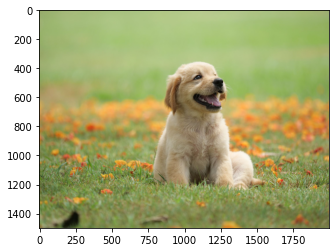

In [97]:
# importing PIL 
from PIL import Image 
import matplotlib.pyplot as plt

# Read Image
img = Image.open("dog.jpg", 'r')

# Output Images
plt.imshow(img)
plt.show()

<div class='alert alert-block alert-success'>
    [Tip] 
    <p><code>plot.imshow()</code>함수를 사용해 주피터 노트북에 바로 이미지 출력시 나타나는 x축과 y축의 숫자는 <b>이미지의 픽셀 좌표</b>를 나타냅니다.</p>
    <li>이미지 왼쪽 상단이 (0, 0) 시작점 입니다.</li>
    <li>만약 640 x 480 크기의 이미지를 출력시, x축은 0~639, y축은 0~479까지의 숫자가 표시됩니다.</li>
</div>

<a id=data></a>
# Data Analysis

이 섹션에서는 **데이터 수집(Data Acquisition)**을 다양한 방법으로 접근하고, **데이터셋에서 필요한 인사이트를 얻는 방법**을 배우게 됩니다.  
이 실습이 끝날 때쯤이면, **Jupyter Notebook**에 데이터를 성공적으로 로드하고, **Pandas 라이브러리**를 사용해 **기본적인 인사이트**를 도출할 수 있을 것입니다.

---

### 📂 **데이터셋 예제: Diabetes Dataset**

이번 실습에서는 **Diabetes Dataset**을 사용합니다.  
이 데이터셋은 **온라인 소스**에서 제공되며, **CSV(Comma Separated Value)** 형식으로 되어 있습니다.  
이제 이 데이터셋을 예시로 사용하여 **데이터 읽기** 연습을 해보겠습니다. 😊

## **About this Dataset**

### 📚 **Context:**  
이 데이터셋은 원래 **National Institute of Diabetes and Digestive and Kidney Diseases(미국 국립 당뇨병, 소화기 및 신장 질환 연구소)**에서 제공된 것입니다.  
이 데이터셋의 목적은 **특정 진단 측정치**를 기반으로 **환자가 당뇨병을 가지고 있는지 예측**하는 것입니다.  
데이터는 더 큰 데이터베이스에서 **여러 조건을 적용해 선택**되었으며,  
특히 이 데이터셋에 포함된 모든 환자는 **21세 이상의 Pima Indian 혈통 여성**입니다.

---

### 📊 **Content:**  
이 데이터셋은 여러 **의료 예측 변수(predictor variables)**와 **하나의 타겟 변수(target variable)**로 구성되어 있습니다.  
- **타겟 변수(Target Variable):** **Outcome** (당뇨병 여부를 나타냄)  
- **예측 변수(Predictor Variables):**  
  - 환자의 **임신 횟수(Pregnancies)**  
  - **BMI(체질량지수)**  
  - **인슐린 수치(Insulin Level)**  
  - **나이(Age)**  
  - 그 외 여러 건강 관련 지표들이 포함되어 있습니다.

---

### ✏️ **목적:**  
이 데이터셋을 활용해 **환자가 당뇨병을 앓고 있는지 여부**를 예측하고 분석하는 모델을 구축할 수 있습니다.

이 데이터셋은 총 **768개의 행(rows)**과 **9개의 열(columns)**로 구성되어 있습니다.

- **처음 8개의 열**은 **특징(features)**을 나타냅니다.  
- **마지막 열**은 **타겟(target)** 또는 **레이블(label)**을 나타냅니다.  

즉, 이 데이터셋은 **8개의 예측 변수**와 **1개의 결과 변수(Outcome)**로 이루어져 있습니다.

In [98]:
# import pandas library

import pandas as pd

In [99]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

import urllib.request
urllib.request.urlretrieve(URL, "diabets.csv")

('diabets.csv', <http.client.HTTPMessage at 0x17b4ed93130>)

데이터셋을 읽은 후, **`dataframe.head(n)`** 메서드를 사용하여 데이터프레임의 **상위 n개 행**을 확인할 수 있습니다. 여기서 **n**은 **정수(integer)**로 입력됩니다.

반대로, **`dataframe.tail(n)`** 메서드는 **하위 n개 행**을 보여줍니다.  
즉, **`head()`**는 데이터의 앞부분을, **`tail()`**은 데이터의 뒷부분을 확인할 때 사용됩니다.

In [106]:
df = pd.read_csv("diabets.csv")

# show the first 5 rows using dataframe.head() method
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


데이터프레임의 **차원(행과 열의 개수)**을 확인하려면 **`.shape`** 속성을 사용합니다.

In [101]:
df.shape

(768, 9)

# Statistical Overview of dataset

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


이 메서드는 데이터프레임에 대한 정보를 출력합니다. **인덱스의 데이터 유형(dtype)**, **열 이름**, **널이 아닌(non-null) 값의 개수**, 그리고 **메모리 사용량(memory usage)** 등을 포함합니다.

> 🔎 해당 메서드는 **`dataframe.info()`**입니다.  
이를 통해 데이터프레임의 **구조와 데이터 타입**을 빠르게 확인할 수 있습니다.

In [104]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pandas의 **`describe()`** 메서드는 데이터프레임이나 **숫자 값 시리즈**에 대해 기본적인 **통계 정보**를 확인할 때 사용됩니다.  
출력되는 통계 정보에는 다음이 포함됩니다:  

- **percentile(백분위수)**  
- **mean(평균)**  
- **standard deviation(표준 편차)**  
- **최소값(min)**, **최대값(max)** 등

숫자 데이터에 사용하면 **기본 통계 요약**을 제공하지만,  
**문자열 시리즈**에 적용하면 **문자 데이터에 대한 다른 통계 정보**를 반환합니다.  
예를 들어, **고유 값 개수**, **가장 빈번한 값** 등이 포함됩니다.

### **결측값 식별 및 처리 (Identify and Handle Missing Values)**

Python에서는 **내장 함수**를 사용하여 **결측값(missing values)**을 식별할 수 있습니다.  
결측값을 감지하는 방법은 두 가지가 있습니다:

1️⃣ **`.isnull()`**  
2️⃣ **`.notnull()`**  

---

### 🔎 **.isnull()**  
- **`.isnull()`** 함수는 **데이터가 결측값인지 여부**를 확인합니다.  
- **결과:** 결측값이면 **`True`**, 결측값이 아니면 **`False`**를 반환합니다.

### 🔎 **.notnull()**  
- **`.notnull()`** 함수는 **데이터가 결측값이 아닌지 여부**를 확인합니다.  
- **결과:** 값이 존재하면 **`True`**, 결측값이면 **`False`**를 반환합니다.

---

### ✅ **출력 결과:**  
이 두 함수의 출력은 **불리언 값(boolean value)**으로 반환되며,  
전달된 값이 실제로 **결측값인지 여부**를 나타냅니다.

예를 들어:  
```python
import pandas as pd

df = pd.DataFrame({"Age": [25, None, 30], "Name": ["Alice", "Bob", None]})

print(df.isnull())
```

**출력:**
```
     Age   Name
0  False  False
1   True  False
2  False   True
```

In [107]:
missing_data = df.isnull()

In [108]:
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


**"True"**는 **결측값(missing value)**을 의미하고,  
**"False"**는 **결측값이 아닌 값(not missing value)**을 의미합니다.

### **각 열의 결측값 개수 세기**

Python의 **for 루프(for loop)**를 사용하여 **각 열에 있는 결측값의 개수**를 빠르게 확인할 수 있습니다.

- 앞서 설명했듯이 **"True"**는 **결측값**을 나타내고, **"False"**는 **값이 존재하는 경우**를 의미합니다.  
- for 루프의 본문에서는 **`.value_counts()`** 메서드를 사용하여 **"True" 값의 개수**를 세어, 각 열에서 결측값이 몇 개인지 확인합니다.

---

### ✅ **예시 설명:**  
```python
for column in df.columns:
    print(f"{column}:", df[column].isnull().value_counts()[True])
```

이 코드는 **각 열의 결측값 개수**를 출력합니다.  
예를 들어, `Age` 열에 결측값이 2개라면 다음과 같은 결과가 나옵니다:

```
Age: 2
Name: 1
```

In [111]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Pregnancies
False    768
Name: Pregnancies, dtype: int64

Glucose
False    768
Name: Glucose, dtype: int64

BloodPressure
False    768
Name: BloodPressure, dtype: int64

SkinThickness
False    768
Name: SkinThickness, dtype: int64

Insulin
False    768
Name: Insulin, dtype: int64

BMI
False    768
Name: BMI, dtype: int64

DiabetesPedigreeFunction
False    768
Name: DiabetesPedigreeFunction, dtype: int64

Age
False    768
Name: Age, dtype: int64

Outcome
False    768
Name: Outcome, dtype: int64



**`.isnull().sum()`**을 사용하는 것이 훨씬 **더 쉽고 직관적**입니다.  

반복문을 사용하지 않고도, **각 열의 결측값 개수**를 바로 확인할 수 있습니다.

---

### ✅ **`.isnull().sum()` 사용 예시:**  
```python
df.isnull().sum()
```

**출력 예시:**
```
Age     2  
Name    1  
Salary  0  
```

---

### 🔎 **왜 더 좋은 방법인가?**  

1️⃣ **간결함** – for 루프 없이 한 줄로 해결할 수 있음.  
2️⃣ **가독성** – 결과가 **Series** 형태로 반환되기 때문에, 각 열의 결측값 개수가 **명확하게 표시**됨.  
3️⃣ **효율성** – 대규모 데이터셋에서도 **빠르고 효율적**으로 동작함.

---

### ✅ **정리:**  
💡 **`.isnull().sum()`**을 사용하면 더 직관적이고 효율적으로 결측값을 확인할 수 있습니다. 😊

In [110]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<hr>

### **데이터 형식 수정하기 (Correct Data Format)**

데이터셋의 모든 값이 **올바른 데이터 형식(int, float, text 등)**으로 되어 있는지 확인하는 것이 중요합니다.

---

### ✅ **데이터 유형 확인**
Pandas에서는 다음 메서드를 사용합니다:

- **`.dtype`** – 각 열의 **데이터 유형**을 확인합니다.
- **`.astype()`** – 열의 **데이터 유형을 변경**할 때 사용합니다.

---

### 📌 **예시: 데이터 유형 확인**

```python
# 데이터 유형 확인
print(df.dtypes)
```

**출력:**
```
Age       int64  
Salary    float64  
Name      object  
```

---

### 📌 **데이터 유형 변경**

```python
# 'Age' 열을 float 형식으로 변경
df['Age'] = df['Age'].astype(float)
```

---

### 🔎 **숫자형 변수 조건**  
- **숫자형 변수(numerical variables)**는 반드시 **`float`** 또는 **`int`** 형식이어야 합니다.  
예를 들어, 나이(Age), 급여(Salary)와 같은 값이 문자열로 저장되어 있다면 **`astype()`**을 사용하여 **숫자형**으로 변환해야 합니다.

---

### 💡 **요약:**  
1️⃣ **`.dtype`**로 데이터 유형을 확인합니다.  
2️⃣ 데이터 유형이 잘못된 경우 **`.astype()`**을 사용하여 올바른 형식으로 변환합니다.  
👉 예를 들어, 나이가 **'25'**처럼 문자열로 저장되어 있다면 **숫자(float/int)**로 변환해야 합니다.

In [113]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

위에서 볼 수 있듯이, **모든 열이 올바른 데이터 유형**을 가지고 있습니다.

<hr>

# **Visualization (시각화)**  

**시각화(Visualization)**는 **데이터셋에서 인사이트를 얻는 가장 효과적인 방법 중 하나**입니다.  
Python에서는 **Seaborn**과 **Matplotlib**이 **가장 강력한 시각화 라이브러리**로 널리 사용됩니다.  

- **Seaborn**: 고급 통계 시각화를 위한 라이브러리  
- **Matplotlib**: 다양한 유형의 그래프와 차트를 그릴 수 있는 범용 시각화 도구  

이 두 라이브러리를 활용하면 데이터를 보다 쉽게 분석하고 이해할 수 있습니다. 😊

In [114]:
# import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

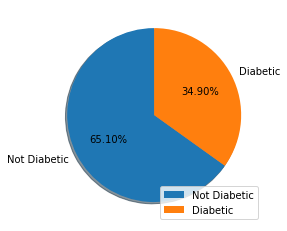

In [123]:
labels= 'Not Diabetic','Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%', shadow=True, startangle=90)
plt.legend(loc='lower right')
plt.show()

위에서 볼 수 있듯이, 65.10%의 여성은 당뇨병이 없고,
34.90%의 여성은 당뇨병이 있습니다.

<div class='alert alert-block alert-success'>
    [Tip]

**`plt.pie(...)`**:
   - matplotlib 라이브러리의 `pie()` 함수를 사용하여 파이 차트를 그립니다.
   - `df['Outcome'].value_counts()`를 첫 번째 인자로 전달하여 파이 차트의 각 조각의 크기를 결정합니다. 위 예시에서는 'Not Diabetic' 조각이 'Diabetic' 조각의 두 배 크기로 그려집니다.
   - `labels=labels`: 파이 차트의 각 조각에 레이블을 지정합니다. `labels` 변수는 'Not Diabetic'과 'Diabetic' 두 개의 레이블을 가지고 있으므로, 각 조각에 해당 레이블이 표시됩니다.
   - `autopct='%0.02f%%'`: 파이 차트의 각 조각에 해당 값의 백분율을 표시합니다. `%0.02f`는 소수점 둘째 자리까지 표시하는 형식 지정자입니다.



**pie() 함수 상세 설명**

`pie()` 함수는 원형 차트를 그리는 데 사용됩니다. 다양한 옵션을 통해 차트의 모양과 스타일을 조정할 수 있습니다. 몇 가지 주요 옵션은 다음과 같습니다.

* **`explode`**: 파이 차트에서 특정 조각을 분리하여 강조할 수 있습니다.
* **`colors`**: 각 조각의 색상을 지정할 수 있습니다.
* **`startangle`**: 파이 차트의 시작 각도를 지정할 수 있습니다.
* **`shadow`**: 파이 차트에 그림자 효과를 추가할 수 있습니다.


</div>

In [137]:
class Rectangle:
    def __init__(self, width=2, heigh=4, color = 'red'):
        self.height = heigh
        self.width = width
        self.color = color
    def drawRect(self):
        import matplotlib.pyplot as plt
        plt.gca().add_patch(plt.Rectangle((0,0), self.width, self.height, fc=self.color))
        plt.axis('scaled')
        plt.show()

In [138]:
obj = Rectangle()

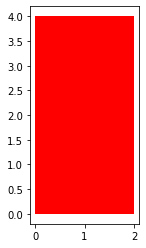

In [139]:
obj.drawRect()

In [141]:
a=np.array([1,1,1,1,1]) 

a+10

array([11, 11, 11, 11, 11])